In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams["axes.grid"] = False

import cv2
import os 
from random import shuffle 
from tqdm import tqdm 

Using TensorFlow backend.


In [2]:
'''Setting up the env'''
  
TRAIN_DIR = 'dataset\Train_data'
TEST_DIR = 'dataset\Test_data'

INPUT_SIZE = 32

def label_img(img): 
    word_label = img.split('(')[0] 
    word_label = word_label.strip()
    # DIY One hot encoder 
    if word_label == 'curved':
        return 0
    elif word_label == 'sinusoidal':
        return 1
    elif word_label == 'straight':
        return 2
        
training_data = [] 

for img in tqdm(os.listdir(TRAIN_DIR)): 

    # labeling the images 
    label = label_img(img) 

    path = os.path.join(TRAIN_DIR, img) 

    # loading the image from the path and then converting them into 
    # greyscale for easier covnet prob 
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 

    # resizing the image for processing them in the covnet 
    img = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE)) 

    # final step-forming the training data list with numpy array of the images 
    training_data.append([np.array(img), np.array(label)]) 
    
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    training_data.append([np.array(img), np.array(label)]) 
    
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    training_data.append([np.array(img), np.array(label)])
    
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    training_data.append([np.array(img), np.array(label)]) 
        
# shuffling of the training data to preserve the random state of our data 
shuffle(training_data) 

# saving our trained data for further uses if required 
np.save('train_data.npy', training_data) 
 
#THE TESTING DATA
    
testing_data = [] 
for img in tqdm(os.listdir(TEST_DIR)): 
    path = os.path.join(TEST_DIR, img) 
    img_num = (img.split('(')[1]).split(')')[0]
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    #img = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE)) 
    testing_data.append([np.array(img), img_num]) 

shuffle(testing_data) 
np.save('test_data.npy', testing_data) 


100%|███████████████████████████████████████████████████████████████████████████████| 153/153 [00:00<00:00, 233.09it/s]


In [3]:
train_data = training_data 
test_data = testing_data

x_train = np.asarray([i[0] for i in training_data]).reshape(len(training_data), INPUT_SIZE, INPUT_SIZE, 1)
y_train = np.asarray([i[1] for i in train_data]).reshape(len(training_data), 1)

In [5]:
#Print the data type of x_train
print(type(x_train))
#Print the data type of y_train
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
#Get the shape of x_train
print('x_train shape:', x_train.shape)
#Get the shape of y_train
print('y_train shape:', y_train.shape)

x_train shape: (1788, 32, 32, 1)
y_train shape: (1788, 1)


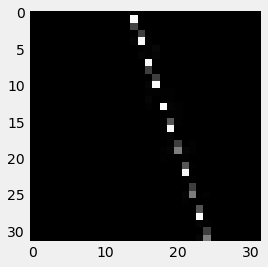

In [7]:
index = 0
img = np.asarray(x_train[index])
gray_img = plt.imshow(np.squeeze(x_train[index]), cmap="gray")

In [8]:
print('The image label is: ', y_train[index])

The image label is:  [2]


In [9]:
classification = ['curved', 'sinusoidal', 'straight']
#Print the image class
print('The image class is: ', classification[y_train[index][0]])

The image class is:  straight


In [10]:
y_train_one_hot = to_categorical(y_train)
#y_test_one_hot = to_categorical(y_test)

In [11]:
print(y_train_one_hot)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [12]:
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 1.]


In [13]:
x_train = x_train / 255
#x_test = x_test / 255

In [14]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy', 
              optimizer='Adam',
              metrics=['accuracy'])

In [16]:
hist = model.fit(x_train, y_train_one_hot, 
            batch_size=256, epochs=10, validation_split=0.2 )

Train on 1430 samples, validate on 358 samples
Epoch 1/10
1430/1430 [==============================] - 1s 959us/step - loss: 1.0168 - accuracy: 0.5252 - val_loss: 0.8935 - val_accuracy: 0.7374
Epoch 2/10
1430/1430 [==============================] - 1s 723us/step - loss: 0.7880 - accuracy: 0.7357 - val_loss: 0.6653 - val_accuracy: 0.7263
Epoch 3/10
1430/1430 [==============================] - 1s 751us/step - loss: 0.5820 - accuracy: 0.7643 - val_loss: 0.4303 - val_accuracy: 0.8547
Epoch 4/10
1430/1430 [==============================] - 1s 770us/step - loss: 0.3654 - accuracy: 0.8524 - val_loss: 0.2710 - val_accuracy: 0.8911
Epoch 5/10
1430/1430 [==============================] - 1s 814us/step - loss: 0.2412 - accuracy: 0.9098 - val_loss: 0.2432 - val_accuracy: 0.9190
Epoch 6/10
1430/1430 [==============================] - 1s 985us/step - loss: 0.1886 - accuracy: 0.9357 - val_loss: 0.1556 - val_accuracy: 0.9469
Epoch 7/10
1430/1430 [==============================] - 1s 1ms/step - loss: 0

In [17]:
#model.evaluate(x_test, y_test_one_hot)[1]

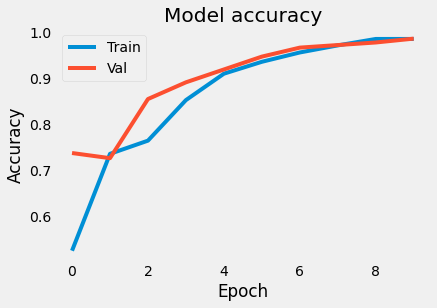

In [18]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

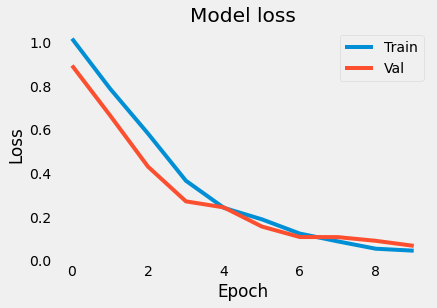

In [19]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

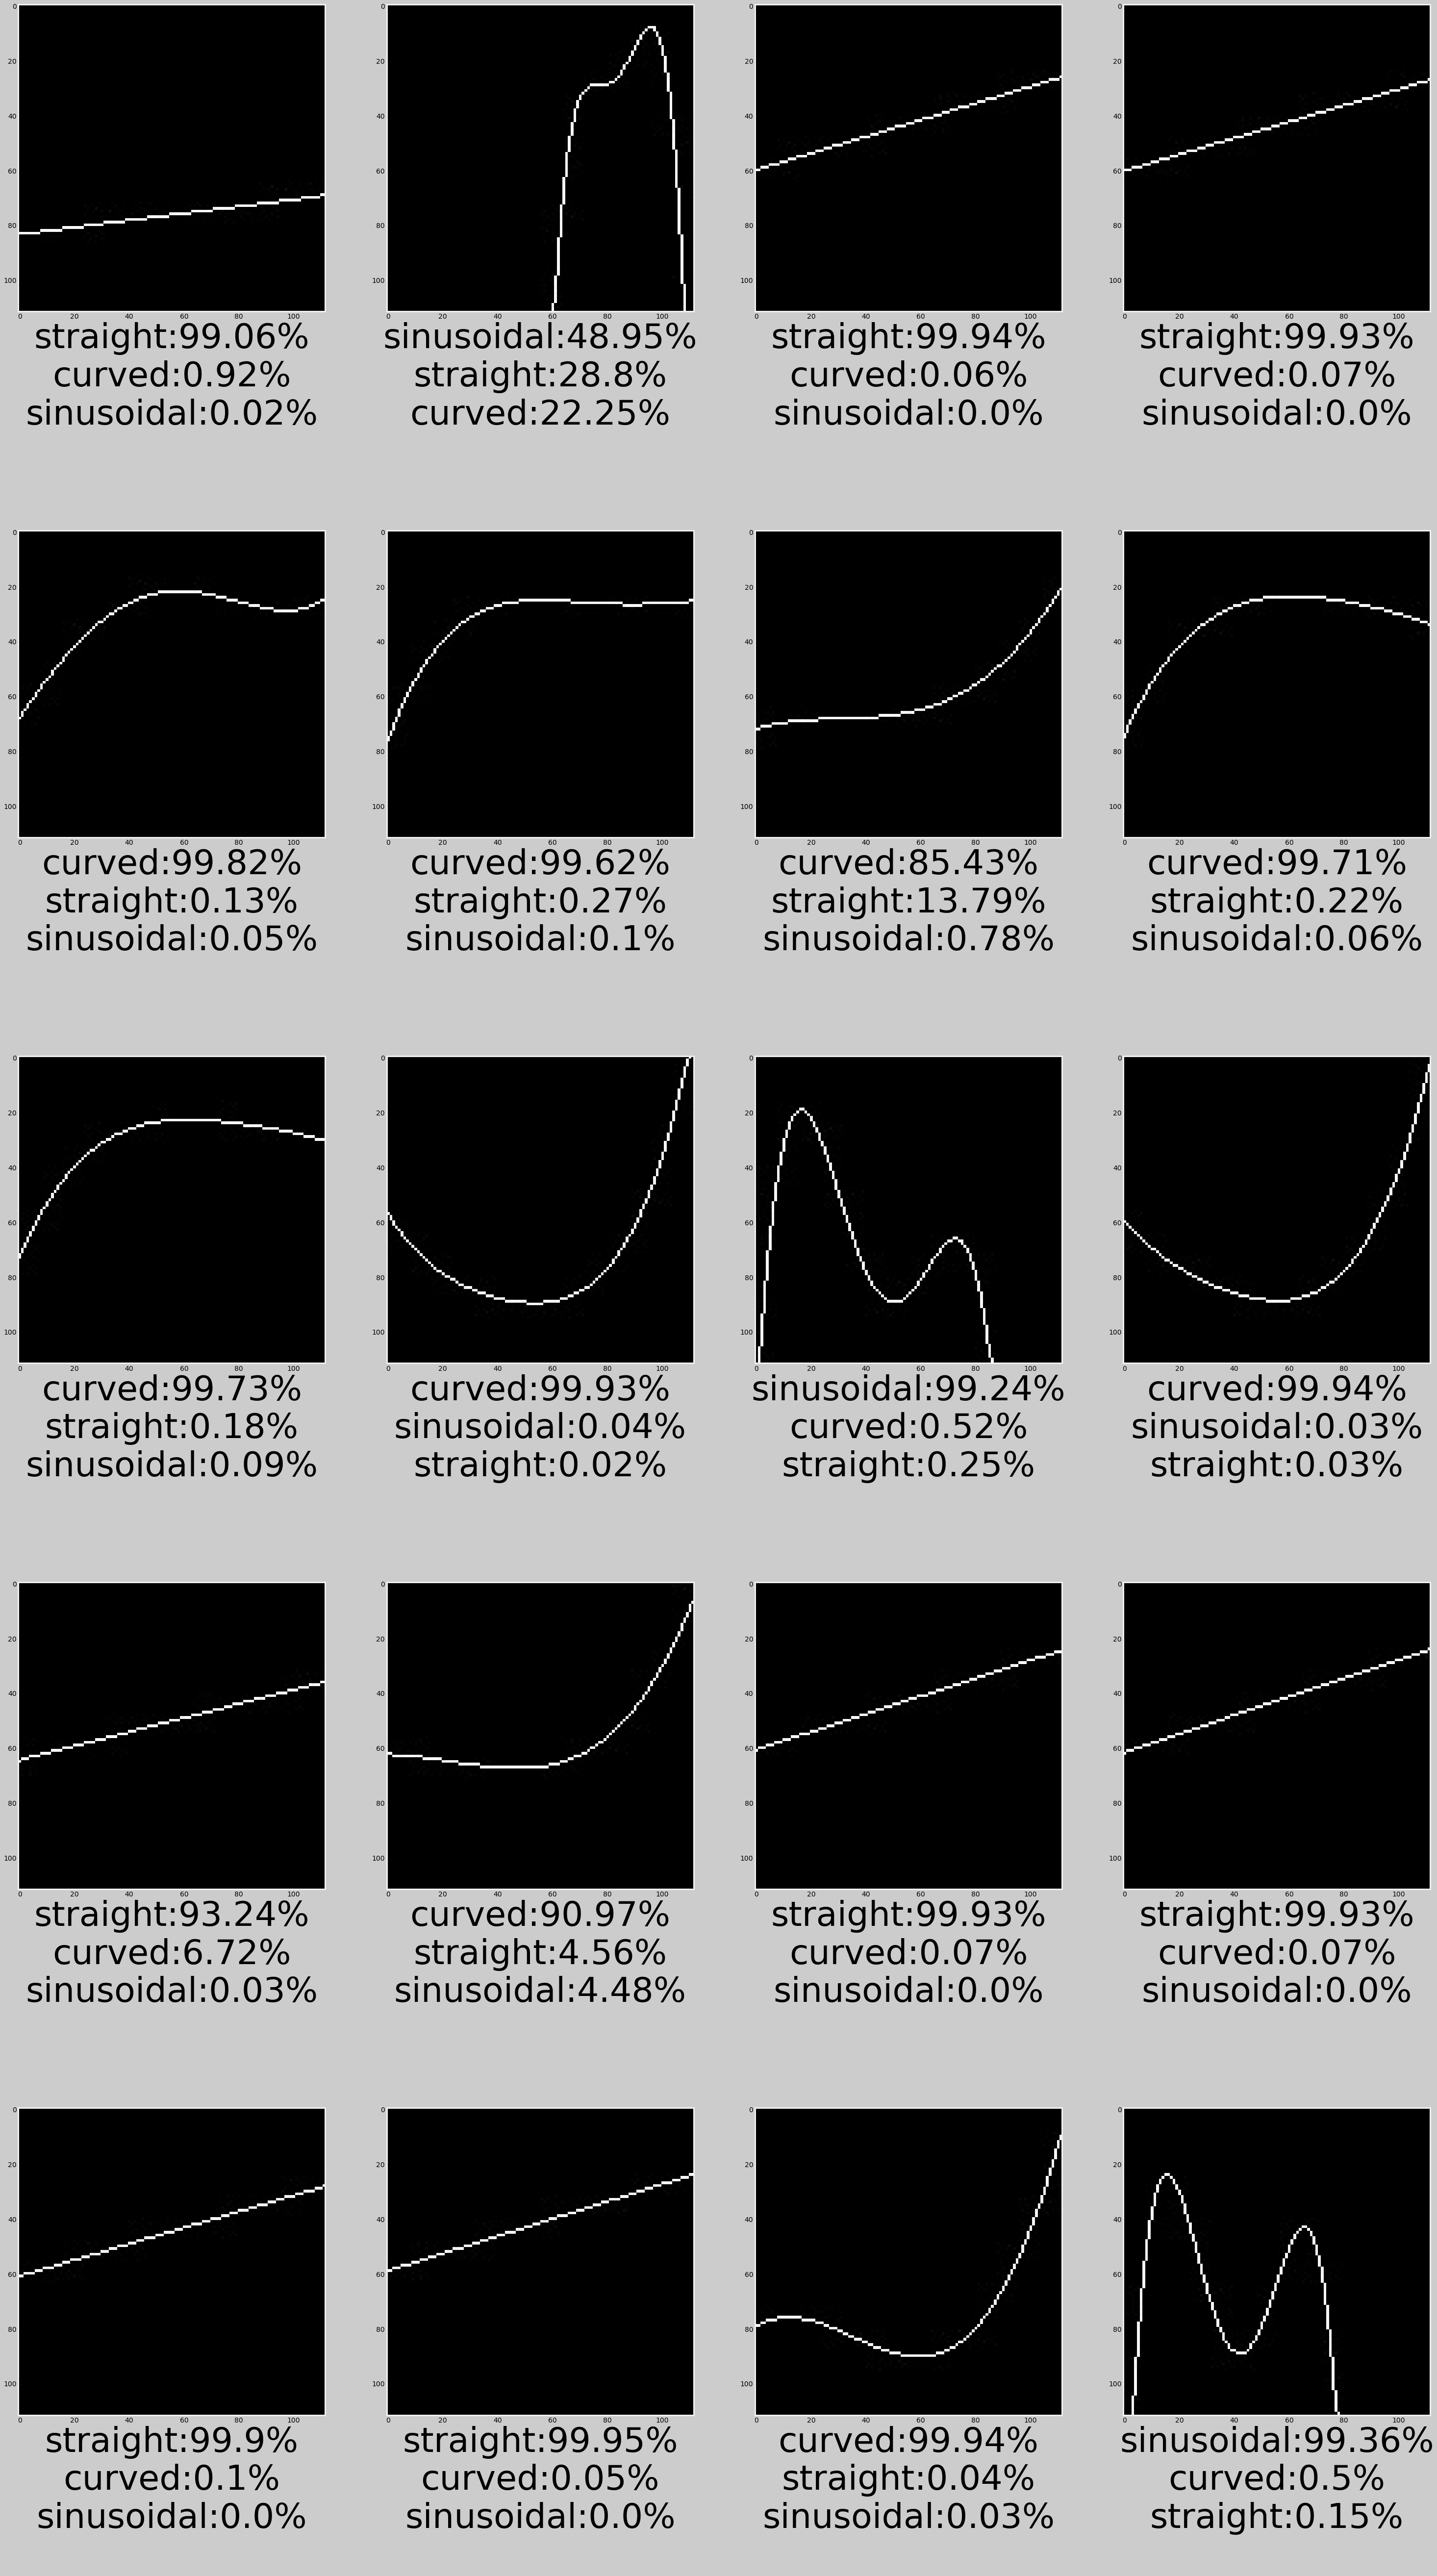

In [20]:
x_test = np.asarray([i[0] for i in testing_data])#.reshape(-1, INPUT_SIZE, INPUT_SIZE, 1)
y_test = np.asarray([i[1] for i in test_data])#.reshape(153,1)

import random
img_list = random.sample(list(x_test), 20)
img_properties = []

for new_image in img_list:
    ###########################################################################

    from skimage.transform import resize
    img = np.asarray(new_image)
    resized_image = resize(np.squeeze(img), (32,32))

    ###########################################################################

    resized_image = np.asarray(resized_image).reshape(INPUT_SIZE, INPUT_SIZE, 1)
    predictions = model.predict(np.array( [resized_image] ))
    predictions

    ###########################################################################

    list_index = [0,1,2]
    x = predictions
    for i in range(3):
      for j in range(3):
        if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp
        
    ###########################################################################

    i=0
    temp=''
    for i in range(3):
      temp += (str(classification[list_index[i]]) + ':' + str(round(predictions[0][list_index[i]] * 100, 2)) + '%\n')
    
    img_properties.append(temp)
    
h, w = x_test[0].shape
img = x_test[0]
fig =plt.figure(figsize=(8, 8))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
#     plt.axis('off')
    plt.imshow(img_list[i-1], cmap="gray")

fig.set_facecolor((0.8, 0.8, 0.8))
    
for i in range(0, columns*rows):
    axes = fig.get_axes()
    axes[i].set_xlabel(img_properties[i],size=70)

plt.subplots_adjust(left=5, bottom=6, right=10, top=15, wspace=0.2, hspace=0.2)

plt.show()